## 

1. The dataset we’ll use for this python project- we’ll call it news.csv. This dataset has a shape of 7796×4. The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE.
https://www.kaggle.com/hassanamin/textdb3


2. https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

3. https://www.kaggle.com/jruvika/fake-news-detection

4. https://www.kaggle.com/mohamadalhasan/a-fake-news-dataset-around-the-syrian-war

In [59]:
!pip install tweet-preprocessor


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('words')


#nlp = spacy.load('en_core_web_sm')
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
%matplotlib inline


import pandas as pd
import string
import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import preprocessor as p
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import spacy 
from sklearn import preprocessing
from nltk.corpus import words
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 1)
le = preprocessing.LabelEncoder()

df1 = pd.read_csv('/content/drive/MyDrive/Fake-news-detectionsystem/news.csv')

df1['label'] = le.fit_transform(df1['label'])

df1 = df1[['title','text','label']]

In [5]:
# 2)
fake = pd.read_csv('/content/drive/MyDrive/Fake-news-detectionsystem/Fake.csv')
real = pd.read_csv('/content/drive/MyDrive/Fake-news-detectionsystem/True.csv')

fake['label'] = 0
real['label'] = 1

df2 = pd.concat([fake,real])
df2 = df2.sample(frac=1).reset_index(drop=True)
df2 = df2[['title','text','label']]

In [6]:
# 3)
df3 = pd.read_csv('/content/drive/MyDrive/Fake-news-detectionsystem/data.csv')

#df1 = df1[['title','text','label']]

In [7]:
# 4)
df4 = pd.read_csv('/content/drive/MyDrive/Fake-news-detectionsystem/FA-KES-Dataset.csv',encoding = 'latin1')
df4.rename(columns={'article_title':'title','article_content':'text','labels':'label'},inplace=True)

df4 = df4[['title','text','label']]

In [8]:
#,df2,df4
df = pd.concat([df1,df4]).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
import nltk
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()
en_stop = set(nltk.corpus.stopwords.words('english'))

In [10]:
clean_data =df['text'].apply(lambda x: p.clean(x))


# data clean methods
#clean_data =df['text'].apply(lambda x: p.clean(x))stopword=stopword+['brt','xfxfxcxe','xfxfxxvaccin']
set_of_words = list(words.words())

def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    
    text = re.sub(r'\d+', '', text)
    # Remove all the special characters
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'[^A-Za-z0-9]+',' ', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Lemmatization
    tokens = text.split()
    tokens = [stemmer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if word not in en_stop]
    
    text  = ' '.join(tokens)
    
    return text

In [11]:
nltk.download('wordnet')
df['clean_text'] = clean_data.apply(lambda x:wordopt(x))
#df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df

title  ...                                         clean_text
0     Terrorist rocket attacks on Salah Eddin neighb...  ...  august terrorist rocket attack salah eddin nei...
1       The College Loan Bombshell Hidden in the Budget  ...  obscure data table buried deep budget proposal...
2               Rand Paul Drops Out Of White House Race  ...  kentucky sen rand paul suspending campaign pre...
3              John Boehner's parting gift to Paul Ryan  ...  top dems want white house call part demo next ...
4     Suicide attack on Syria wedding kills 32 Medic...  ...  updated suicide attack syria wedding kill medi...
...                                                 ...  ...                                                ...
7134  Afghan officials say Mullah Omar, Taliban lead...  ...  reclusive leader taliban seen public decade gr...
7135  130,000 Americans demand to forbid Soros manip...  ...  american demand forbid soros manipulate electi...
7136  VA Hospital Honors Decorated Veteran of Three ...  ...  tweet u po toe po ta toe po ta toe indianapoli...
7137  Poll: 71 percent of Dems think Clinton should ...  ...  strong majority democratic voter think hillary...
7138  Bernie vs. Hillary: Who connects better with v...  ...  sally kohn activist columnist television comme...

[7139 rows x 4 columns]

In [60]:
df['clean_text'][1]

'obscure data table buried deep budget proposal obama administration revealed week student loan program billion shortfall last year apparently largest ever recorded government credit program main cause shortfall wa president barack obamas recent effort provide relief borrower drowning student debt reform already begun reduce loan payment government two decade budget analyst recalculated projected cost credit program every year never lowered expectation repayment dramatically billion revisionlarger annual budget nasa interior department epa combinedwill tacked onto federal deficit wow marveled steve elli vice president taxpayer common sense whether good policy help borrower payment obviously costly taxpayer million american student loan saddled trillion outstanding debt higher education cost rising much faster inflation already massive program ha growing spectacular clip direct government loan alone increased percent last two year despite aura austerity washington obama administration h

In [14]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer() 
tfidfVectorizer.fit(df['clean_text'])
# save the model to disk
filename = 'tfidfVector_model.sav'
joblib.dump(tfidfVectorizer, filename)

tfidfVector = tfidfVectorizer.transform(df['clean_text'])

df_tfidf = pd.DataFrame(tfidfVector.toarray(), columns=tfidfVectorizer.get_feature_names())

df_tfidf['label']=df['label']

le = preprocessing.LabelEncoder()
df_tfidf['label'] = le.fit_transform(df_tfidf['label'])

# Fake=0 and real = 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
df_tfidf

aa  aaa  aaahhh  aab  ...  zwicker  zwischenmenschlicher  zyuganov  zzor
0     0.0  0.0     0.0  0.0  ...      0.0                   0.0       0.0   0.0
1     0.0  0.0     0.0  0.0  ...      0.0                   0.0       0.0   0.0
2     0.0  0.0     0.0  0.0  ...      0.0                   0.0       0.0   0.0
3     0.0  0.0     0.0  0.0  ...      0.0                   0.0       0.0   0.0
4     0.0  0.0     0.0  0.0  ...      0.0                   0.0       0.0   0.0
...   ...  ...     ...  ...  ...      ...                   ...       ...   ...
7134  0.0  0.0     0.0  0.0  ...      0.0                   0.0       0.0   0.0
7135  0.0  0.0     0.0  0.0  ...      0.0                   0.0       0.0   0.0
7136  0.0  0.0     0.0  0.0  ...      0.0                   0.0       0.0   0.0
7137  0.0  0.0     0.0  0.0  ...      0.0                   0.0       0.0   0.0
7138  0.0  0.0     0.0  0.0  ...      0.0                   0.0       0.0   0.0

[7139 rows x 67326 columns]

In [16]:
df

title  ...                                         clean_text
0     Terrorist rocket attacks on Salah Eddin neighb...  ...  august terrorist rocket attack salah eddin nei...
1       The College Loan Bombshell Hidden in the Budget  ...  obscure data table buried deep budget proposal...
2               Rand Paul Drops Out Of White House Race  ...  kentucky sen rand paul suspending campaign pre...
3              John Boehner's parting gift to Paul Ryan  ...  top dems want white house call part demo next ...
4     Suicide attack on Syria wedding kills 32 Medic...  ...  updated suicide attack syria wedding kill medi...
...                                                 ...  ...                                                ...
7134  Afghan officials say Mullah Omar, Taliban lead...  ...  reclusive leader taliban seen public decade gr...
7135  130,000 Americans demand to forbid Soros manip...  ...  american demand forbid soros manipulate electi...
7136  VA Hospital Honors Decorated Veteran of Three ...  ...  tweet u po toe po ta toe po ta toe indianapoli...
7137  Poll: 71 percent of Dems think Clinton should ...  ...  strong majority democratic voter think hillary...
7138  Bernie vs. Hillary: Who connects better with v...  ...  sally kohn activist columnist television comme...

[7139 rows x 4 columns]

In [69]:
df.iloc[7138].clean_text

'sally kohn activist columnist television commentator follow twitter opinion expressed commentary cnn without remotely level name recognition campaign infrastructure medium spotlight sen bernie sander ha already posed significant challenge hillary clinton campaign democratic presidential nomination imagine tuesday nationally televised debate hosted cnn could underdog sander lead clinton early primary state new hampshire within striking distance iowa although continues trail former secretary state double digit among democrat nationally arguably sander popularity among democratic voter fueled much sander populist position regular guy disposition stand contrast chronically calculating centrist clinton debate lose showing stage presumptive front runner showing wider audience substantively stylistically challenge clinton sander gain clinton want avoid protracted fight democratic nomination mention sort upset suffered hand barack obama best interest brush aside sander soon possible first dem

In [18]:
msk = np.random.rand(len(df_tfidf)) < 0.8

X_train = df_tfidf.drop('label',axis=1)[msk]

X_test = df_tfidf.drop('label',axis=1)[~msk]

y_train = df_tfidf['label'][msk]

y_test = df_tfidf['label'][~msk]



In [19]:
X_train,X_test,y_train,y_test = train_test_split(df_tfidf.drop('label',axis=1),df_tfidf['label'],random_state=42,stratify=df['label'],test_size=0.33)

In [20]:
y_train

3806    0
3179    1
4116    0
327     1
5036    1
       ..
4033    1
250     1
1862    1
6621    0
1080    1
Name: label, Length: 4783, dtype: int64

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# save the model to disk
filename = 'RF_final_model.pkl'
joblib.dump(rf, filename)



predict=rf.predict(X_test)
rf_acc = accuracy_score(y_test,predict)

In [22]:
# Confusion Matrix

def generate_confusion_matrix(cf_matrix, normalize=False, title='Confusion matrix'):
    if normalize:
        cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")

        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = [np.round(value,2) for value in
                        cf_matrix.flatten()]

        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_names,group_counts)]
    
    else:
        print('Confusion matrix')
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in
                        cf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f"{v1}\n{v3}" for v1, v3 in
                  zip(group_names,group_percentages)] #group_counts
    
    
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Fake','Real'],
                yticklabels=['Fake','Real'],)
    plt.title(title)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cf_matrix

Confusion matrix


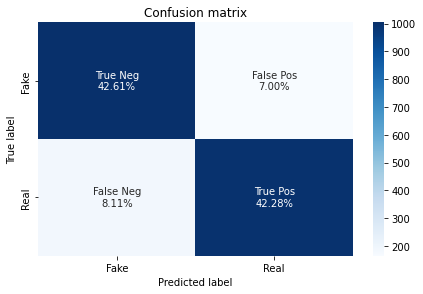

In [23]:
plt.figure()

cf_matrix = confusion_matrix(y_test, predict)
generate_confusion_matrix(cf_matrix)
plt.show()

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train,y_train)

# save the model to disk
filename = 'GBC_model.pkl'
joblib.dump(GBC, filename)

predict=GBC.predict(X_test)
GBC_acc = accuracy_score(y_test,predict)

Confusion matrix


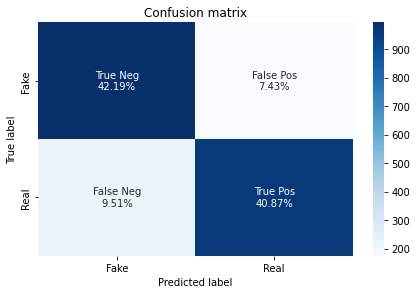

In [25]:
plt.figure()

cf_matrix = confusion_matrix(y_test, predict)
generate_confusion_matrix(cf_matrix)
plt.show()

In [26]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# save the model to disk
filename = 'DT_model.pkl'
joblib.dump(clf, filename)

predict=clf.predict(X_test)
clf_acc = accuracy_score(y_test,predict)

Confusion matrix


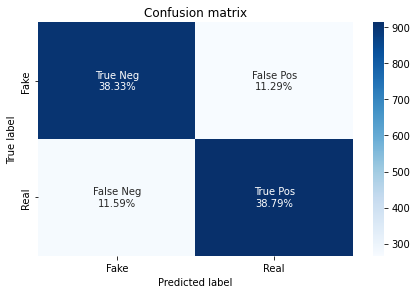

In [27]:
plt.figure()

cf_matrix = confusion_matrix(y_test, predict)
generate_confusion_matrix(cf_matrix)
plt.show()

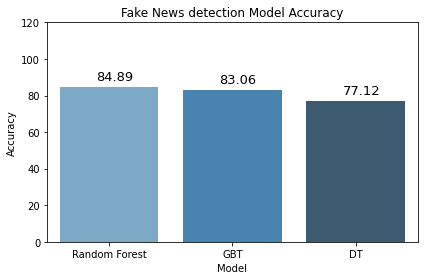

In [28]:
plt.figure(figsize=(6,4))
g= sns.barplot(x=['Random Forest','GBT',"DT"],y=[rf_acc*100,GBC_acc*100,clf_acc*100],palette="Blues_d")

ax=g
#annotate axis = seaborn axis
for pt in ax.patches:
             ax.annotate("%.2f" % pt.get_height(), (pt.get_x() + pt.get_width() / 1.8, pt.get_height()),
                 ha='center', va='center', fontsize=13, xytext=(0,10),
                 textcoords='offset points')
_ = g.set_ylim(0,120) #To make space for the annotations

plt.title('Fake News detection Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.tight_layout()

In [29]:
input_news = 'U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.\n\nThe visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.\n\nThe French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own security needs can be taxing on a country, and Kerry had prior commitments.\n\nAmong roughly 40 leaders who did attend was Israeli Prime Minister Benjamin Netanyahu, no stranger to intense security, who marched beside Hollande through the city streets. The highest ranking U.S. officials attending the march were Jane Hartley, the ambassador to France, and Victoria Nuland, the assistant secretary of state for European affairs. Attorney General Eric H. Holder Jr. was in Paris for meetings with law enforcement officials but did not participate in the march.\n\nKerry spent Sunday at a business summit hosted by India’s prime minister, Narendra Modi. The United States is eager for India to relax stringent laws that function as barriers to foreign investment and hopes Modi’s government will act to open the huge Indian market for more American businesses.\n\nIn a news conference, Kerry brushed aside criticism that the United States had not sent a more senior official to Paris as “quibbling a little bit.” He noted that many staffers of the American Embassy in Paris attended the march, including the ambassador. He said he had wanted to be present at the march himself but could not because of his prior commitments in India.\n\n“But that is why I am going there on the way home, to make it crystal clear how passionately we feel about the events that have taken place there,” he said.\n\n“And I don’t think the people of France have any doubts about America’s understanding of what happened, of our personal sense of loss and our deep commitment to the people of France in this moment of trauma.”'
# 'indian prime minister is narendra modi found Covid positive.'

In [70]:
input_news = '''sally kohn activist columnist television commentator follow twitter opinion expressed commentary cnn without remotely level name recognition campaign infrastructure medium spotlight sen bernie sander ha already posed significant challenge hillary clinton campaign democratic presidential nomination imagine tuesday nationally televised debate hosted cnn could underdog sander lead clinton early primary state new hampshire within striking distance iowa although continues trail former secretary state double digit among democrat nationally arguably sander popularity among democratic voter fueled much sander populist position regular guy disposition stand contrast chronically calculating centrist clinton debate lose showing stage presumptive front runner showing wider audience substantively stylistically challenge clinton sander gain clinton want avoid protracted fight democratic nomination mention sort upset suffered hand barack obama best interest brush aside sander soon possible first democratic primary debate earliest best opportunity look clinton employ three strategy first likely try lump position sander democratic contender say democratic candidate mainly share vision party best interest served picking one best shot elected electability clinton strongest argument especially democrat become legitimately freaked cast character vying republican nomination clinton interest de emphasize ideological difference democratic side imply agreement part true sander try poke hole script especially respect clinton economic agenda ha rhetorically populist conventionally centrist policy term sander many populist democrat opposed agreement giveaway big business hurt american worker clinton tacitly backed deal secretary state free express opinion separate stance obama administration ally populist opposition trade deal even doe people believe stance anything crass opportunism win voter fleeing sander clinton second strategy likely try highlight way progressive democratic opponent especially sander recent mass shooting oregon day debate yet brings surface concern democratic voter voter general fed congress failure pas common sense gun law despite overwhelming need widespread public support clinton draw clear contrast sander ha opposed gun control measure step majority democratic primary voter issue may difficulty demonstrating sincerity economic populism contrast senator vermont strong weak record gun hard position defend especially similarly clinton try distinguish progressive addressing racial bias structural racism despite sander self professed position progressive candidate speaking racial justice police violence black life matter movement ha woefully inadequate best clinton much better discussion race often tainted unsettling defensiveness still clearly comfortable talking race sander ha given thought racial injustice poison america institution culture talking debate good america good candidacy third look clinton try connect authentically viewer home show human side many voter may get lost substantive back forth clinton support versus sander support various policy based accusation election also gut instinct candidate share value vision gut instinct especially triggered voter see candidate side side part clinton say right thing spout populist rhetoric sounding like touch patrician work say clinton emphasize showing heart humor campaign aide promised retooling rather damn self show voter want particular personality much want real person hopefully nothing else trump ha taught candidate first democratic debate pivotal since voter form first perhaps lasting impression candidate match sander debate lose play right could also clinton debate win'''

In [71]:
def predict_sentiment(text):
    temp = p.clean(input_news)

    test_doc = wordopt(temp)

    test_vect = tfidfVectorizer.transform(pd.DataFrame([test_doc]).iloc[0])
    test_tfidf = pd.DataFrame(test_vect.toarray(), columns=tfidfVectorizer.get_feature_names())
    test_tfidf.drop('label',axis=1,inplace=True)
    
    RF_model_saved = joblib.load('RF_final_model.pkl')
    GBC_model_saved = joblib.load('GBC_model.pkl')
    DT_model_saved = joblib.load('DT_model.pkl')
    print(DT_model_saved.predict(test_tfidf)[0])
    print('News prediction by RF is: ', 'Real' if RF_model_saved.predict(test_tfidf)[0] else 'Fake')
    print('News prediction by GBC is: ', 'Real' if GBC_model_saved.predict(test_tfidf)[0] else 'Fake')
    print('News prediction by DT is: ', 'Real' if DT_model_saved.predict(test_tfidf)[0] else 'Fake')

In [72]:
predict_sentiment(input_news)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0
News prediction by RF is:  Real
News prediction by GBC is:  Real
News prediction by DT is:  Fake
